Data Catalog:
               Data Type  Non-Null Count  Missing Values (%)
title            object            1062            0.094073
price            object             930           12.511759
location         object            1062            0.094073
type_de_vente    object             386           63.687676
salon           float64             640           39.793039
chamber         float64             339           68.109125
toilete         float64             336           68.391345
area            float64             693           34.807150
link             object            1063            0.000000


/tmp/ipykernel_20770/1987339184.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


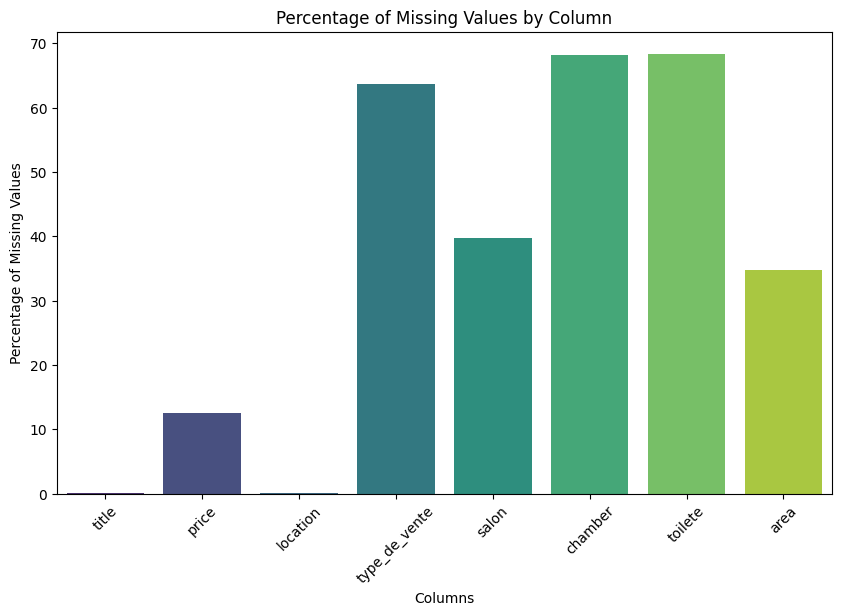

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/home/corolo/Desktop/analysisAvito/data/appartements_data.csv')

# Data catalog: Column names, data types, and missing values percentage
catalog = pd.DataFrame({
    "Data Type": data.dtypes,
    "Non-Null Count": data.notnull().sum(),
    "Missing Values (%)": (data.isnull().sum() / len(data)) * 100
})
print("Data Catalog:\n", catalog)

# Plot missing values for visualization
missing_values = (data.isnull().sum() / len(data)) * 100
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.show()


In [57]:
# Display column names to verify their exact spelling
print("Column Names:", data.columns)

Column Names: Index(['title', 'price', 'location', 'type_de_vente', 'salon', 'chamber',
       'toilete', 'area', 'link'],
      dtype='object')


In [58]:
from sklearn.impute import KNNImputer

# Convert 'price' to numeric by removing non-numeric characters
data['price'] = data['price'].replace('[^\d.]', '', regex=True).astype(float)

# Fill missing values in 'salon', 'chamber', 'toilete', and 'area' using median
for col in ['salon', 'chamber', 'toilete', 'area']:
    data[col].fillna(data[col].median(), inplace=True)

# Use KNN Imputer for 'price'
imputer = KNNImputer(n_neighbors=5)
data[['price']] = imputer.fit_transform(data[['price']])


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_20770/4109101374.py:4: SyntaxWarning: invalid escape sequence '\d'
  data['price'] = data['price'].replace('[^\d.]', '', regex=True).astype(float)
/tmp/ipykernel_20770/4109101374.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipykernel_20770/4109101374.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained ass

In [59]:
# Define function to infer 'type_de_vente' based on keywords in 'title'
def infer_type_de_vente(title):
    title = str(title).lower()
    if any(keyword in title for keyword in ["louer", "location", "loué"]):
        return "louer"
    elif any(keyword in title for keyword in ["vendre", "vente", "à vendre"]):
        return "vendre"
    return None

# Apply the function and fill remaining NaNs with 'unknown'
data['type_de_vente'] = data.apply(
    lambda row: row['type_de_vente'] if pd.notnull(row['type_de_vente']) else infer_type_de_vente(row['title']),
    axis=1
)
data['type_de_vente'].fillna("unknown", inplace=True)
print(data['type_de_vente'].value_counts())


type_de_vente
unknown                   394
Appartements, à vendre    386
louer                     275
vendre                      8
Name: count, dtype: int64


/tmp/ipykernel_20770/157154393.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['type_de_vente'].fillna("unknown", inplace=True)


Number of Outliers in 'price': 8


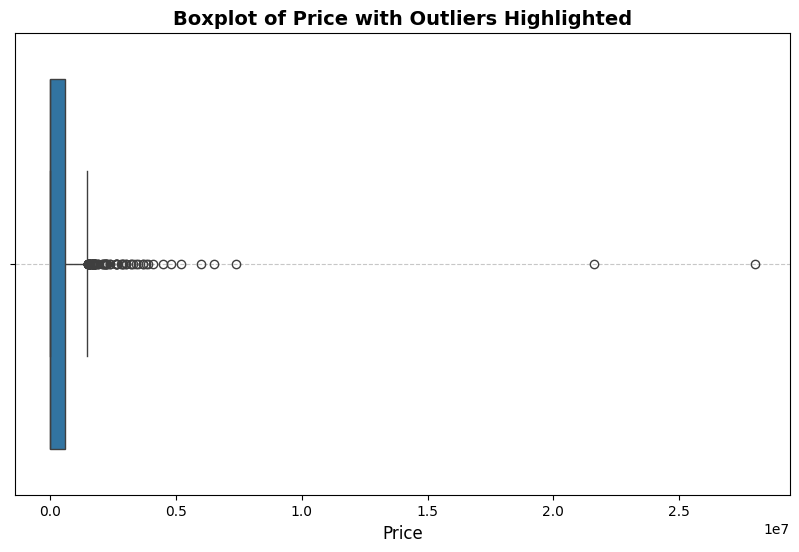

Number of Outliers in 'area': 109


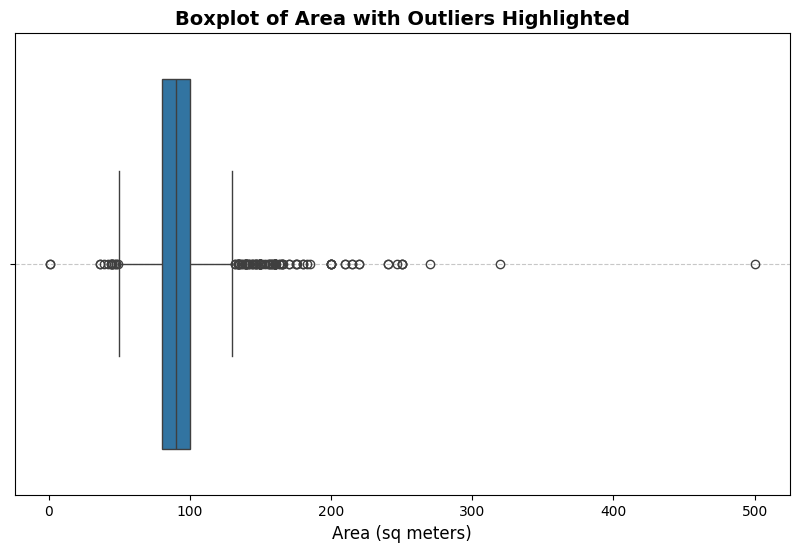

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Calculate Z-score for outliers in 'price'
data['price_zscore'] = zscore(data['price'])
price_outliers = data[(data['price_zscore'] > 3) | (data['price_zscore'] < -3)]
print("Number of Outliers in 'price':", len(price_outliers))

# Boxplot for 'price' with enhanced readability
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title("Boxplot of Price with Outliers Highlighted", fontsize=14, fontweight='bold')
plt.xlabel("Price", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate IQR for 'area' and identify outliers
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
area_outliers = data[(data['area'] < (Q1 - 1.5 * IQR)) | (data['area'] > (Q3 + 1.5 * IQR))]
print("Number of Outliers in 'area':", len(area_outliers))

# Boxplot for 'area' with enhanced readability
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['area'])
plt.title("Boxplot of Area with Outliers Highlighted", fontsize=14, fontweight='bold')
plt.xlabel("Area (sq meters)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


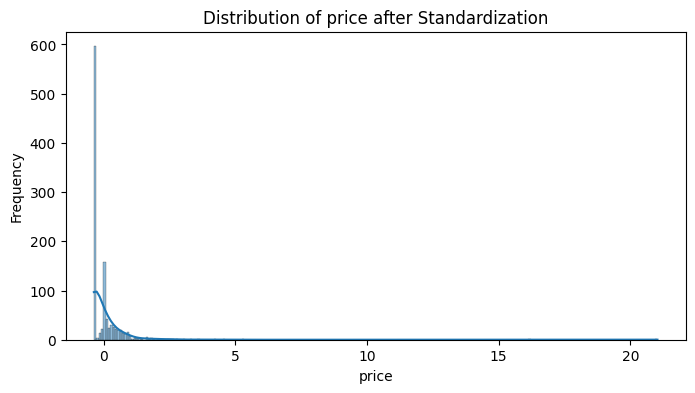

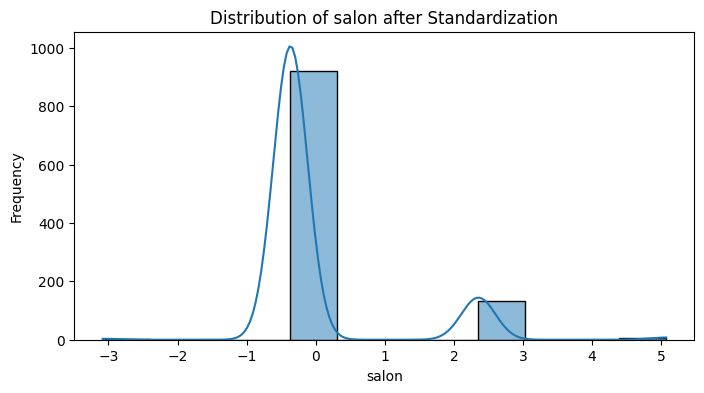

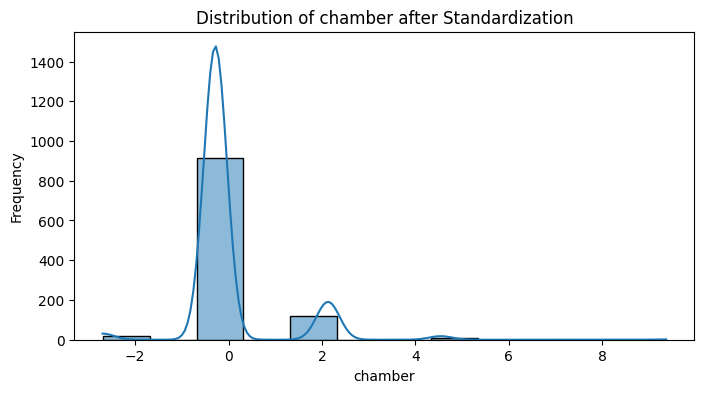

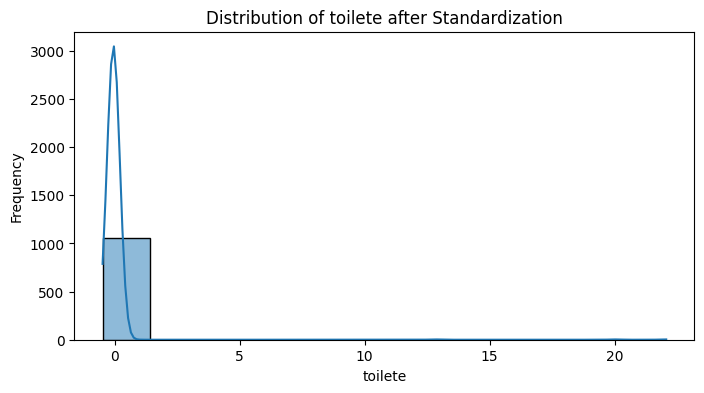

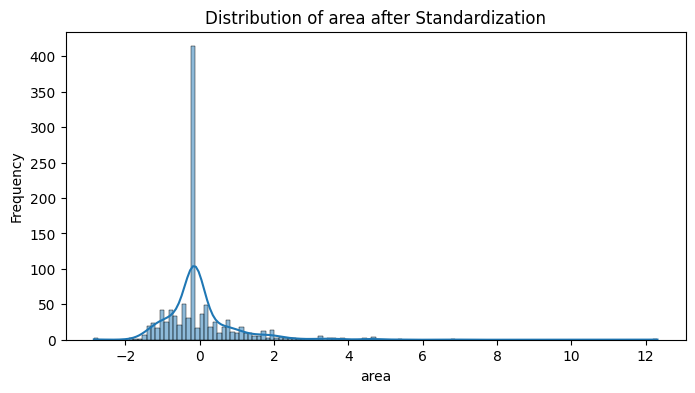

In [62]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric columns for uniform scaling
scaler = StandardScaler()
data[['price', 'salon', 'chamber', 'toilete', 'area']] = scaler.fit_transform(
    data[['price', 'salon', 'chamber', 'toilete', 'area']]
)

# Plot distributions of standardized data
for col in ['price', 'salon', 'chamber', 'toilete', 'area']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col} after Standardization')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


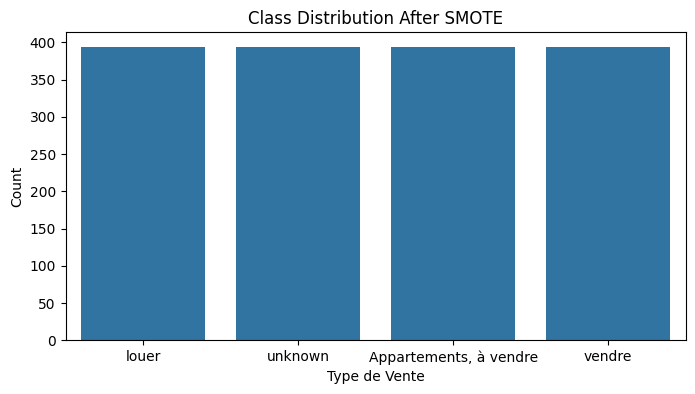

In [66]:
from imblearn.over_sampling import SMOTE

# Select only numeric columns for SMOTE
X = data.select_dtypes(include=['number'])  # Keep only numeric columns in X
y = data['type_de_vente']  # y is the target variable

# Apply SMOTE to balance classes in 'type_de_vente'
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot class distribution after SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Type de Vente")
plt.ylabel("Count")
plt.show()


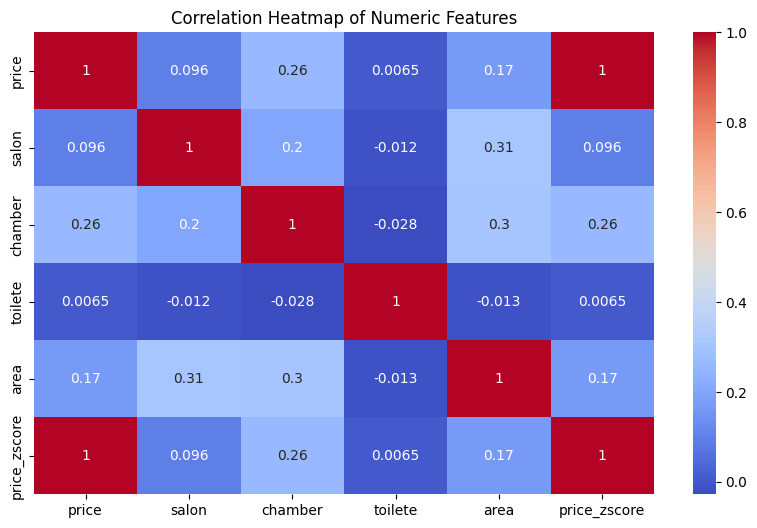

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
